In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

# 5월 27일 프로야구 한화 이글스 vs LG트윈스 승부예측

## 데이터 불러오기

In [333]:
lg_df1 = pd.read_csv('LG 타자 종합 data.csv', encoding="cp949")
hh_df1 = pd.read_csv('한화 타자 종합 data.csv', encoding="cp949")

lg_df2 = pd.read_csv('LG 타자 아웃카운트별 data.csv', encoding="cp949")
hh_df2 = pd.read_csv('한화 타자 아웃카운트별 data.csv', encoding="cp949")

lg_df3 = pd.read_csv('LG 타자 주자 위치별 data.csv', encoding="cp949")
hh_df3 = pd.read_csv('한화 타자 주자 위치별 data.csv', encoding="cp949")

lg_df4 = pd.read_csv('LG 타자 카운트별 data.csv', encoding="cp949")
hh_df4 = pd.read_csv('한화 타자 카운트별 data.csv', encoding="cp949")

lg_df5 = pd.read_csv('LG 투수 상대전적 data.csv', encoding='utf-8')
hh_df5 = pd.read_csv('한화 투수 상대전적 data.csv', encoding="utf-8")

In [335]:
lg_df1

,타자 정보,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS
0,홍창기,0.254,30,3,0,0,11,19,2,3,20,32,0.280,0.381,0.661
1,박해민,0.243,26,4,0,0,5,16,5,1,17,35,0.280,0.349,0.629
2,오스틴,0.309,38,7,0,10,30,29,0,2,20,17,0.610,0.400,1.010
3,문보경,0.308,41,6,0,7,32,26,0,2,22,30,0.511,0.409,0.920
4,김현수,0.290,31,5,0,1,18,16,0,0,21,15,0.364,0.415,0.770
5,박동원,0.319,36,5,0,9,26,23,1,1,17,26,0.602,0.414,1.016
6,오지환,0.236,25,7,0,3,16,14,4,3,8,31,0.387,0.288,0.675
7,문성주,0.235,20,2,0,0,8,11,0,1,10,12,0.259,0.313,0.572
8,신민재,0.202,18,1,0,0,12,14,1,0,19,11,0.213,0.349,0.562
9,송찬의,0.232,19,7,0,2,9,5,1,1,5,27,0.390,0.289,0.679


In [337]:
hh_df1

,타자 정보,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS
0,최인호,0.256,10,2,0,0,3,2,1,0,5,9,0.308,0.356,0.664
1,플로리얼,0.253,37,12,1,2,20,16,0,1,14,43,0.390,0.317,0.707
2,문현빈,0.305,36,7,0,6,20,15,0,0,8,21,0.517,0.359,0.876
3,노시환,0.275,38,6,1,10,25,27,0,0,14,37,0.551,0.355,0.906
4,채은성,0.265,35,12,0,2,12,14,1,0,9,35,0.402,0.326,0.728
5,이진영,0.333,24,7,0,3,12,16,0,2,11,22,0.548,0.414,0.962
6,최재훈,0.315,17,1,0,0,10,5,2,4,12,7,0.333,0.461,0.784
7,심우준,0.165,15,3,1,1,9,9,3,0,3,21,0.253,0.191,0.444
8,황영묵,0.209,19,6,0,1,6,16,1,0,13,12,0.308,0.308,0.616
9,김태연,0.243,25,2,0,1,8,14,2,0,6,24,0.291,0.297,0.588


In [339]:
lg_df2

,아웃카운트에 따른 타율,0 OUT,1 OUT,2 OUT
0,홍창기,0.327,0.185,0.194
1,박해민,0.350,0.067,0.270
2,오스틴,0.333,0.304,0.293
3,문보경,0.354,0.257,0.300
4,김현수,0.250,0.282,0.333
5,박동원,0.379,0.295,0.300
6,오지환,0.135,0.273,0.306
7,문성주,0.171,0.324,0.188
8,신민재,0.194,0.250,0.176
9,송찬의,0.172,0.296,0.231


In [341]:
hh_df2

,아웃카운트에 따른 타율,0 OUT,1 OUT,2 OUT
0,최인호,0.100,0.385,0.250
1,플로리얼,0.184,0.306,0.239
2,문현빈,0.250,0.348,0.300
3,노시환,0.279,0.378,0.180
4,채은성,0.239,0.267,0.293
5,이진영,0.323,0.333,0.333
6,최재훈,0.263,0.412,0.278
7,심우준,0.138,0.265,0.219
8,황영묵,0.214,0.310,0.050
9,김태연,0.229,0.303,0.200


## df3 NaN값 채워주기

In [343]:
lg_df3

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,홍창기,0.263,0.000,0.0,0.100,0.667,0.333,0.500
1,박해민,0.118,0.000,0.0,0.000,0.000,0.000,0.286
2,오스틴,0.292,0.333,1.0,0.222,0.429,NaN,1.000
3,문보경,0.407,0.143,NaN,0.389,0.000,0.000,0.667
4,김현수,0.200,0.571,0.2,0.333,0.667,0.750,1.000
5,박동원,0.310,0.444,0.5,0.333,0.200,0.000,0.000
6,오지환,0.118,0.000,0.4,0.429,0.000,0.333,0.500
7,문성주,0.267,0.167,0.0,0.600,0.250,0.500,0.000
8,신민재,0.071,0.500,0.0,0.600,0.333,0.000,0.750
9,송찬의,0.167,0.167,0.0,0.250,0.000,NaN,0.250


In [345]:
cols_to_fill = ["1루", "2루", "3루", "1루,2루", "1루,3루", "2루,3루", "만루"]
lg_df3[cols_to_fill] = lg_df3[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)
lg_df3

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,홍창기,0.263,0.000,0.000000,0.100,0.667,0.333000,0.500
1,박해민,0.118,0.000,0.000000,0.000,0.000,0.000000,0.286
2,오스틴,0.292,0.333,1.000000,0.222,0.429,0.546000,1.000
3,문보경,0.407,0.143,0.267667,0.389,0.000,0.000000,0.667
4,김현수,0.200,0.571,0.200000,0.333,0.667,0.750000,1.000
5,박동원,0.310,0.444,0.500000,0.333,0.200,0.000000,0.000
6,오지환,0.118,0.000,0.400000,0.429,0.000,0.333000,0.500
7,문성주,0.267,0.167,0.000000,0.600,0.250,0.500000,0.000
8,신민재,0.071,0.500,0.000000,0.600,0.333,0.000000,0.750
9,송찬의,0.167,0.167,0.000000,0.250,0.000,0.139000,0.250


In [347]:
hh_df3

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,최인호,0.571,0.167,NaN,0.400,1.000,0.00,0.00
1,플로리얼,0.353,0.286,0.333,0.333,0.200,0.25,0.20
2,문현빈,0.421,0.167,0.500,0.200,0.250,0.00,0.75
3,노시환,0.133,0.308,0.333,0.500,0.000,0.25,0.00
4,채은성,0.192,0.125,0.333,0.222,0.500,0.00,0.50
5,이진영,0.467,0.286,0.000,0.000,1.000,0.25,1.00
6,최재훈,0.333,0.250,0.667,0.333,0.000,0.00,0.50
7,심우준,0.105,0.111,0.333,0.333,0.000,NaN,1.00
8,황영묵,0.462,0.222,0.000,0.000,0.333,0.00,NaN
9,김태연,0.385,0.222,0.000,0.333,NaN,0.50,0.00


In [351]:
cols_to_fill = ["1루", "2루", "3루", "1루,2루", "1루,3루", "2루,3루", "만루"]
hh_df3[cols_to_fill] = hh_df3[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)
hh_df3

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,최인호,0.571,0.167,0.356333,0.400,1.000,0.000000,0.0000
1,플로리얼,0.353,0.286,0.333000,0.333,0.200,0.250000,0.2000
2,문현빈,0.421,0.167,0.500000,0.200,0.250,0.000000,0.7500
3,노시환,0.133,0.308,0.333000,0.500,0.000,0.250000,0.0000
4,채은성,0.192,0.125,0.333000,0.222,0.500,0.000000,0.5000
5,이진영,0.467,0.286,0.000000,0.000,1.000,0.250000,1.0000
6,최재훈,0.333,0.250,0.667000,0.333,0.000,0.000000,0.5000
7,심우준,0.105,0.111,0.333000,0.333,0.000,0.313667,1.0000
8,황영묵,0.462,0.222,0.000000,0.000,0.333,0.000000,0.1695
9,김태연,0.385,0.222,0.000000,0.333,0.240,0.500000,0.0000


## df4 NaN값 채워주기

In [353]:
lg_df4

,카운트에 따른 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,홍창기,0.250,0.313,0.176,0.333,0.400,0.333,0.263,0.043,0.375,0.667,0.667,NaN
1,박해민,0.444,0.417,0.118,0.000,0.250,0.000,0.158,0.217,0.333,0.000,0.000,NaN
2,오스틴,0.455,0.400,0.250,0.250,0.286,0.000,0.167,0.143,0.375,0.438,0.438,NaN
3,문보경,0.409,0.375,0.250,0.250,0.333,0.200,0.200,0.167,0.467,0.571,0.500,NaN
4,김현수,0.300,0.400,0.091,0.600,0.125,0.333,0.176,0.222,0.200,0.462,0.500,NaN
5,박동원,0.571,0.167,0.250,0.333,0.545,0.000,0.167,0.056,0.182,0.800,0.500,0.0
6,오지환,0.364,0.100,0.222,0.333,0.667,NaN,0.172,0.167,0.083,0.750,0.000,NaN
7,문성주,0.200,0.400,0.000,0.273,0.250,0.333,0.200,0.176,0.083,0.400,1.000,NaN
8,신민재,0.059,0.667,0.154,0.000,0.000,0.500,0.000,0.214,0.545,0.400,0.200,NaN
9,송찬의,0.750,0.167,0.000,0.222,0.667,0.000,0.182,0.286,0.182,0.400,0.250,NaN


In [355]:
count_cols = ['0S 0B', '2S', '1S 1B', '1S 2B', '1S 3B', 
              '2S 1B', '2S 2B', '2S 3B', '1B', '2B', '3B']

lg_df4[count_cols] = lg_df4[count_cols].fillna(lg_df4[count_cols].mean())
lg_df4

,카운트에 따른 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,홍창기,0.250,0.313,0.176,0.333,0.400,0.3330,0.263,0.043,0.375,0.667,0.667,0.0
1,박해민,0.444,0.417,0.118,0.000,0.250,0.0000,0.158,0.217,0.333,0.000,0.000,0.0
2,오스틴,0.455,0.400,0.250,0.250,0.286,0.0000,0.167,0.143,0.375,0.438,0.438,0.0
3,문보경,0.409,0.375,0.250,0.250,0.333,0.2000,0.200,0.167,0.467,0.571,0.500,0.0
4,김현수,0.300,0.400,0.091,0.600,0.125,0.3330,0.176,0.222,0.200,0.462,0.500,0.0
5,박동원,0.571,0.167,0.250,0.333,0.545,0.0000,0.167,0.056,0.182,0.800,0.500,0.0
6,오지환,0.364,0.100,0.222,0.333,0.667,0.2699,0.172,0.167,0.083,0.750,0.000,0.0
7,문성주,0.200,0.400,0.000,0.273,0.250,0.3330,0.200,0.176,0.083,0.400,1.000,0.0
8,신민재,0.059,0.667,0.154,0.000,0.000,0.5000,0.000,0.214,0.545,0.400,0.200,0.0
9,송찬의,0.750,0.167,0.000,0.222,0.667,0.0000,0.182,0.286,0.182,0.400,0.250,0.0


In [357]:
hh_df4

,카운트별 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,최인호,0.750,0.250,0.000,0.000,0.667,1.000,0.125,0.143,0.000,0.333,NaN,NaN
1,플로리얼,0.474,0.667,0.059,0.111,0.455,0.750,0.032,0.174,0.231,0.600,0.200,NaN
2,문현빈,0.500,0.167,0.133,0.308,0.200,0.667,0.286,0.333,0.273,0.250,0.250,NaN
3,노시환,0.417,0.429,0.000,0.417,0.364,0.000,0.286,0.214,0.000,0.385,0.333,1.0
4,채은성,0.222,0.421,0.188,0.467,0.667,NaN,0.158,0.167,0.000,0.167,0.400,NaN
5,이진영,0.286,0.455,0.222,0.800,0.500,0.000,0.091,0.417,0.000,0.250,1.000,NaN
6,최재훈,0.000,0.571,0.125,0.333,0.333,0.000,0.333,0.154,0.800,NaN,0.333,NaN
7,심우준,0.167,0.077,0.250,0.167,0.167,NaN,0.105,0.176,0.100,0.333,0.667,NaN
8,황영묵,0.313,0.364,0.125,0.091,0.250,0.500,0.000,0.294,0.000,0.167,0.000,NaN
9,김태연,0.300,0.100,0.250,0.500,0.333,0.500,0.150,0.238,0.200,0.250,0.333,NaN


In [359]:
count_cols = ['0S 0B', '2S', '1S 1B', '1S 2B', '1S 3B', 
              '2S 1B', '2S 2B', '2S 3B', '1B', '2B', '3B']

hh_df4[count_cols] = hh_df4[count_cols].fillna(hh_df4[count_cols].mean())
hh_df4['3B'] = 0.0 #평균으로 안함
hh_df4

,카운트별 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,최인호,0.750,0.250,0.000,0.000,0.667,1.000000,0.125,0.143,0.000,0.3330,0.4516,0.0
1,플로리얼,0.474,0.667,0.059,0.111,0.455,0.750000,0.032,0.174,0.231,0.6000,0.2000,0.0
2,문현빈,0.500,0.167,0.133,0.308,0.200,0.667000,0.286,0.333,0.273,0.2500,0.2500,0.0
3,노시환,0.417,0.429,0.000,0.417,0.364,0.000000,0.286,0.214,0.000,0.3850,0.3330,0.0
4,채은성,0.222,0.421,0.188,0.467,0.667,0.427125,0.158,0.167,0.000,0.1670,0.4000,0.0
5,이진영,0.286,0.455,0.222,0.800,0.500,0.000000,0.091,0.417,0.000,0.2500,1.0000,0.0
6,최재훈,0.000,0.571,0.125,0.333,0.333,0.000000,0.333,0.154,0.800,0.3068,0.3330,0.0
7,심우준,0.167,0.077,0.250,0.167,0.167,0.427125,0.105,0.176,0.100,0.3330,0.6670,0.0
8,황영묵,0.313,0.364,0.125,0.091,0.250,0.500000,0.000,0.294,0.000,0.1670,0.0000,0.0
9,김태연,0.300,0.100,0.250,0.500,0.333,0.500000,0.150,0.238,0.200,0.2500,0.3330,0.0


## 상대전적 데이터 추가적으로 생성하기

In [361]:
lg_df5

,상대전적,류현진
0,홍창기,0.167
1,박해민,0.000
2,오스틴,0.200
3,문보경,0.400
4,김현수,0.250
5,박동원,0.600
6,오지환,0.000
7,문성주,0.000
8,신민재,NaN
9,송찬의,0.333


In [363]:
타자컬럼 = ['류현진']
for col in 타자컬럼:
    col_mean = lg_df5[col].mean()
    def fill_func(row):
        if pd.isna(row[col]):
            return (col_mean)
        else:
            return row[col]
    lg_df5[col] = lg_df5.apply(fill_func, axis=1)

lg_df5

,상대전적,류현진
0,홍창기,0.167
1,박해민,0.000
2,오스틴,0.200
3,문보경,0.400
4,김현수,0.250
5,박동원,0.600
6,오지환,0.000
7,문성주,0.000
8,신민재,0.195
9,송찬의,0.333


In [365]:
hh_df5

,상대전적,임찬규
0,최인호,NaN
1,플로리얼,0.250
2,문현빈,0.000
3,노시환,0.333
4,채은성,0.333
5,이진영,NaN
6,최재훈,NaN
7,심우준,0.000
8,황영묵,0.333
9,김태연,0.000


In [369]:
타자컬럼 = ['임찬규']
for col in 타자컬럼:
    col_mean = hh_df5[col].mean()
    def fill_func(row):
        if pd.isna(row[col]):
            return (col_mean)
        else:
            return row[col]
    hh_df5[col] = hh_df5.apply(fill_func, axis=1)

hh_df5

,상대전적,임찬규
0,최인호,0.156125
1,플로리얼,0.250000
2,문현빈,0.000000
3,노시환,0.333000
4,채은성,0.333000
5,이진영,0.156125
6,최재훈,0.156125
7,심우준,0.000000
8,황영묵,0.333000
9,김태연,0.000000


## 타순 짜기

In [371]:
lg_df1 = lg_df1.rename(columns={'타자 정보': '타자명'})
lg_df5 = lg_df5.rename(columns={'상대전적': '타자명'})

In [373]:
df1 = pd.merge(lg_df1, lg_df5[['타자명', '류현진']], on='타자명', how='left')
df1

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS,류현진
0,홍창기,0.254,30,3,0,0,11,19,2,3,20,32,0.280,0.381,0.661,0.167
1,박해민,0.243,26,4,0,0,5,16,5,1,17,35,0.280,0.349,0.629,0.000
2,오스틴,0.309,38,7,0,10,30,29,0,2,20,17,0.610,0.400,1.010,0.200
3,문보경,0.308,41,6,0,7,32,26,0,2,22,30,0.511,0.409,0.920,0.400
4,김현수,0.290,31,5,0,1,18,16,0,0,21,15,0.364,0.415,0.770,0.250
5,박동원,0.319,36,5,0,9,26,23,1,1,17,26,0.602,0.414,1.016,0.600
6,오지환,0.236,25,7,0,3,16,14,4,3,8,31,0.387,0.288,0.675,0.000
7,문성주,0.235,20,2,0,0,8,11,0,1,10,12,0.259,0.313,0.572,0.000
8,신민재,0.202,18,1,0,0,12,14,1,0,19,11,0.213,0.349,0.562,0.195
9,송찬의,0.232,19,7,0,2,9,5,1,1,5,27,0.390,0.289,0.679,0.333


## 타율, OPS, 투수 상대전적을 각각 0.3 0.6 0.1 가중치로 두어서 합산

In [375]:
df1['점수'] = (df1['타율'] * 0.3) + (df1['OPS'] * 0.6) + (df1['류현진'] * 0.1)
df_lg타순 = df1.sort_values(by='점수', ascending=False)
df_lg타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS,류현진,점수
5,박동원,0.319,36,5,0,9,26,23,1,1,17,26,0.602,0.414,1.016,0.600,0.7653
2,오스틴,0.309,38,7,0,10,30,29,0,2,20,17,0.610,0.400,1.010,0.200,0.7187
3,문보경,0.308,41,6,0,7,32,26,0,2,22,30,0.511,0.409,0.920,0.400,0.6844
4,김현수,0.290,31,5,0,1,18,16,0,0,21,15,0.364,0.415,0.770,0.250,0.5740
9,송찬의,0.232,19,7,0,2,9,5,1,1,5,27,0.390,0.289,0.679,0.333,0.5103
0,홍창기,0.254,30,3,0,0,11,19,2,3,20,32,0.280,0.381,0.661,0.167,0.4895
6,오지환,0.236,25,7,0,3,16,14,4,3,8,31,0.387,0.288,0.675,0.000,0.4758
1,박해민,0.243,26,4,0,0,5,16,5,1,17,35,0.280,0.349,0.629,0.000,0.4503
10,구본혁,0.236,17,4,1,0,7,7,3,0,7,12,0.319,0.313,0.632,0.000,0.4500
8,신민재,0.202,18,1,0,0,12,14,1,0,19,11,0.213,0.349,0.562,0.195,0.4173


In [377]:
hh_df1 = hh_df1.rename(columns={'타자 정보': '타자명'})
hh_df5 = hh_df5.rename(columns={'상대전적': '타자명'})

In [379]:
df2 = pd.merge(hh_df1, hh_df5[['타자명', '임찬규']], on='타자명', how='left')
df2

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS,임찬규
0,최인호,0.256,10,2,0,0,3,2,1,0,5,9,0.308,0.356,0.664,0.156125
1,플로리얼,0.253,37,12,1,2,20,16,0,1,14,43,0.390,0.317,0.707,0.250000
2,문현빈,0.305,36,7,0,6,20,15,0,0,8,21,0.517,0.359,0.876,0.000000
3,노시환,0.275,38,6,1,10,25,27,0,0,14,37,0.551,0.355,0.906,0.333000
4,채은성,0.265,35,12,0,2,12,14,1,0,9,35,0.402,0.326,0.728,0.333000
5,이진영,0.333,24,7,0,3,12,16,0,2,11,22,0.548,0.414,0.962,0.156125
6,최재훈,0.315,17,1,0,0,10,5,2,4,12,7,0.333,0.461,0.784,0.156125
7,심우준,0.165,15,3,1,1,9,9,3,0,3,21,0.253,0.191,0.444,0.000000
8,황영묵,0.209,19,6,0,1,6,16,1,0,13,12,0.308,0.308,0.616,0.333000
9,김태연,0.243,25,2,0,1,8,14,2,0,6,24,0.291,0.297,0.588,0.000000


In [381]:
df2['점수'] = (df2['타율'] * 0.3) + (df2['OPS'] * 0.6) + (df2['임찬규'] * 0.1)
df_한화타순 = df2.sort_values(by='점수', ascending=False)
df_한화타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS,임찬규,점수
5,이진영,0.333,24,7,0,3,12,16,0,2,11,22,0.548,0.414,0.962,0.156125,0.692712
3,노시환,0.275,38,6,1,10,25,27,0,0,14,37,0.551,0.355,0.906,0.333000,0.659400
2,문현빈,0.305,36,7,0,6,20,15,0,0,8,21,0.517,0.359,0.876,0.000000,0.617100
6,최재훈,0.315,17,1,0,0,10,5,2,4,12,7,0.333,0.461,0.784,0.156125,0.580512
4,채은성,0.265,35,12,0,2,12,14,1,0,9,35,0.402,0.326,0.728,0.333000,0.549600
1,플로리얼,0.253,37,12,1,2,20,16,0,1,14,43,0.390,0.317,0.707,0.250000,0.525100
0,최인호,0.256,10,2,0,0,3,2,1,0,5,9,0.308,0.356,0.664,0.156125,0.490812
8,황영묵,0.209,19,6,0,1,6,16,1,0,13,12,0.308,0.308,0.616,0.333000,0.465600
9,김태연,0.243,25,2,0,1,8,14,2,0,6,24,0.291,0.297,0.588,0.000000,0.425700
10,이재원,0.200,9,0,1,0,5,0,1,2,3,9,0.244,0.240,0.484,0.000000,0.350400


## 경기 예측하기

In [383]:
lg_df1 = lg_df1.rename(columns={'타자 정보': '타자명'})
lg_df2 = lg_df2.rename(columns={'아웃카운트에 따른 타율': '타자명'})
lg_df3 = lg_df3.rename(columns={'주자 위치에 따른 타율': '타자명'})
lg_df4 = lg_df4.rename(columns={'카운트에 따른 타자 타율': '타자명'})
lg_df5 = lg_df5.rename(columns={'상대전적': '타자명'})

In [385]:
hh_df1 = hh_df1.rename(columns={'타자 정보': '타자명'})
hh_df2 = hh_df2.rename(columns={'아웃카운트에 따른 타율': '타자명'})
hh_df3 = hh_df3.rename(columns={'주자 위치에 따른 타율': '타자명'})
hh_df4 = hh_df4.rename(columns={'카운트별 타자 타율': '타자명'})
hh_df5 = hh_df5.rename(columns={'상대전적': '타자명'})

In [387]:
merge_keys = ['타자명']

lg_merged = lg_df1.merge(lg_df2, on=merge_keys, how='left') \
                           .merge(lg_df3, on=merge_keys, how='left') \
                           .merge(lg_df4, on=merge_keys, how='left')


In [389]:
lg_merged

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,홍창기,0.254,30,3,0,0,11,19,2,3,...,0.176,0.333,0.400,0.3330,0.263,0.043,0.375,0.667,0.667,0.0
1,박해민,0.243,26,4,0,0,5,16,5,1,...,0.118,0.000,0.250,0.0000,0.158,0.217,0.333,0.000,0.000,0.0
2,오스틴,0.309,38,7,0,10,30,29,0,2,...,0.250,0.250,0.286,0.0000,0.167,0.143,0.375,0.438,0.438,0.0
3,문보경,0.308,41,6,0,7,32,26,0,2,...,0.250,0.250,0.333,0.2000,0.200,0.167,0.467,0.571,0.500,0.0
4,김현수,0.290,31,5,0,1,18,16,0,0,...,0.091,0.600,0.125,0.3330,0.176,0.222,0.200,0.462,0.500,0.0
5,박동원,0.319,36,5,0,9,26,23,1,1,...,0.250,0.333,0.545,0.0000,0.167,0.056,0.182,0.800,0.500,0.0
6,오지환,0.236,25,7,0,3,16,14,4,3,...,0.222,0.333,0.667,0.2699,0.172,0.167,0.083,0.750,0.000,0.0
7,문성주,0.235,20,2,0,0,8,11,0,1,...,0.000,0.273,0.250,0.3330,0.200,0.176,0.083,0.400,1.000,0.0
8,신민재,0.202,18,1,0,0,12,14,1,0,...,0.154,0.000,0.000,0.5000,0.000,0.214,0.545,0.400,0.200,0.0
9,송찬의,0.232,19,7,0,2,9,5,1,1,...,0.000,0.222,0.667,0.0000,0.182,0.286,0.182,0.400,0.250,0.0


In [391]:
hh_merged = hh_df1.merge(hh_df2, on=merge_keys, how='left') \
                           .merge(hh_df3, on=merge_keys, how='left') \
                           .merge(hh_df4, on=merge_keys, how='left')

In [393]:
hh_merged

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,최인호,0.256,10,2,0,0,3,2,1,0,...,0.000,0.000,0.667,1.000000,0.125,0.143,0.000,0.3330,0.4516,0.0
1,플로리얼,0.253,37,12,1,2,20,16,0,1,...,0.059,0.111,0.455,0.750000,0.032,0.174,0.231,0.6000,0.2000,0.0
2,문현빈,0.305,36,7,0,6,20,15,0,0,...,0.133,0.308,0.200,0.667000,0.286,0.333,0.273,0.2500,0.2500,0.0
3,노시환,0.275,38,6,1,10,25,27,0,0,...,0.000,0.417,0.364,0.000000,0.286,0.214,0.000,0.3850,0.3330,0.0
4,채은성,0.265,35,12,0,2,12,14,1,0,...,0.188,0.467,0.667,0.427125,0.158,0.167,0.000,0.1670,0.4000,0.0
5,이진영,0.333,24,7,0,3,12,16,0,2,...,0.222,0.800,0.500,0.000000,0.091,0.417,0.000,0.2500,1.0000,0.0
6,최재훈,0.315,17,1,0,0,10,5,2,4,...,0.125,0.333,0.333,0.000000,0.333,0.154,0.800,0.3068,0.3330,0.0
7,심우준,0.165,15,3,1,1,9,9,3,0,...,0.250,0.167,0.167,0.427125,0.105,0.176,0.100,0.3330,0.6670,0.0
8,황영묵,0.209,19,6,0,1,6,16,1,0,...,0.125,0.091,0.250,0.500000,0.000,0.294,0.000,0.1670,0.0000,0.0
9,김태연,0.243,25,2,0,1,8,14,2,0,...,0.250,0.500,0.333,0.500000,0.150,0.238,0.200,0.2500,0.3330,0.0


In [397]:
def compute_player_hit_probs(df):

    # 타율과 OPS의 최소, 최대 값 계산합니다.
    avg_min, avg_max = df['타율'].min(), df['타율'].max()
    ops_min, ops_max = df['OPS'].min(), df['OPS'].max()

    player_probs = {}

    for idx, row in df.iterrows():
        pa = estimate_at_bats(row)
        total_hits = row['안타']

        if pa == 0 or total_hits == 0 or pd.isna(row['타율']) or pd.isna(row['OPS']):
            probs = {'1B': 0, '2B': 0, '3B': 0, 'HR': 0, 'OUT': 1.0}
            
        else:
            avg_range = max(0.001, avg_max - avg_min)
            ops_range = max(0.001, ops_max - ops_min)

            avg_norm = (row['타율'] - avg_min) / avg_range
            ops_norm = (row['OPS'] - ops_min) / ops_range
            # 선수별 안타칠 확률을 계산합니다. (0.1~0.35 사이로 설정)
            # 이 값들을 자유롭게 변경하셔서 실제 결과와 비슷한 parameter가 무엇일지 찾아보면 좋을 것 같습니다!
            
            #1. 상황별 데이터를 활용해서 다양한 상황 속에서 타자가 안타 칠 확률을 계산합니다.
            out_weights = ['0아웃', '1아웃', '2아웃']
            
            #(득점권 상황)
            runner_weights = ['만루', '2루,3루', '1루,3루', '1루,2루']
            
            #(현대 야구에서 가장 많은 타격이 일어나는 카운트)
            count_weights = ['2S 3B', '2S 2B', '2S 1B', '1S 1B', '1S 2B', '1S 3B']

            out_weight = np.mean([row.get(ow, 0.25) for ow in out_weights])
            runner_weight = np.mean([row.get(rw, 0.25) for rw in runner_weights])
            count_weight = np.mean([row.get(cw, 0.25) for cw in count_weights])
            
            
            # 기본데이터를 활용한 확률 (타율과 OPS를 각각 0.5, 0.5 가중치를 두었습니다.)
            base_hit_prob = 0.1 + 0.2 * (0.5 * avg_norm + 0.5 * ops_norm)
            
            # 상황별 데이터를 활용한 확률 (각각 0.3, 0.4, 0.3 가중치를 두었습니다.)
            situational_factor = 0.05 * (0.3 * out_weight + 0.4 * runner_weight + 0.3 * count_weight) / 3  
            prob_hit = min(0.35, base_hit_prob + situational_factor)
            prob_out = 1 - prob_hit

            # 각 선수별 안타, 2루타, 3루타, 홈런칠 확률 생성합니다.
            prob_1B = max(0.01, row['1B'] / total_hits)
            prob_2B = max(0.007, row['2B'] / total_hits)
            prob_3B = max(0.005, row['3B'] / total_hits)
            prob_HR = max(0.003, row['홈런'] / total_hits)

            total_ratio = prob_1B + prob_2B + prob_3B + prob_HR
            prob_1B /= total_ratio
            prob_2B /= total_ratio
            prob_3B /= total_ratio
            prob_HR /= total_ratio
            
            probs = {
                '1B': prob_hit * prob_1B,
                '2B': prob_hit * prob_2B,
                '3B': prob_hit * prob_3B,
                'HR': prob_hit * prob_HR,
                'OUT': prob_out
            }

            total_prob = sum(probs.values())
            if total_prob > 0:
                for k in probs:
                    probs[k] /= total_prob

        player_probs[row['타자명']] = probs

    return player_probs

## 전체 타석 계산하기

In [399]:
def estimate_at_bats(row):
    sac = row.get('희생번트', 0)
    sf = row.get('희생플라이', 0)
    if row['타율'] > 0:
        est_pa = row['안타'] / row['타율']
    else:
        est_pa = 100 
    est_pa -= sac + sf
    return max(1, est_pa)

## 타석 시뮬레이션 하기

In [401]:
def simulate_at_bat(player_name, player_probs):
    probs = player_probs[player_name]
    return random.choices(list(probs.keys()), weights=list(probs.values()), k=1)[0]

## 타석 결과에 따른 주자의 위치 및 점수 최신화

In [403]:
def update_bases(base_state, result):
    runs = 0
    new_bases = [0, 0, 0]

    if result == 'OUT':
        return base_state, runs

    if result == 'HR':
        runs = sum(base_state) + 1
        return [0, 0, 0], runs

    if result == '1B':
        runs += base_state[2]
        new_bases[2] = base_state[1]
        new_bases[1] = base_state[0]
        new_bases[0] = 1
    elif result == '2B':
        runs += base_state[2] + base_state[1]
        new_bases[2] = base_state[0]
        new_bases[1] = 1
    elif result == '3B':
        runs += sum(base_state)
        new_bases[2] = 1

    return new_bases, runs

## 각각의 이닝별로 결과를 시뮬레이션하기

In [405]:
def simulate_half_inning(lineup, player_probs, start_idx):
    outs = 0
    bases = [0, 0, 0]
    score = 0
    batter_idx = start_idx
    batter_stats = {name: {'타수': 0, '안타': 0} for name in lineup}

    while outs < 3:
        batter = lineup[batter_idx % len(lineup)]
        result = simulate_at_bat(batter, player_probs)
        batter_stats[batter]['타수'] += 1
        if result != 'OUT':
            batter_stats[batter]['안타'] += 1
        bases, runs = update_bases(bases, result)
        score += runs
        if result == 'OUT':
            outs += 1
        batter_idx += 1

    return score, batter_idx, batter_stats

In [407]:
def simulate_game(away_lineup, away_probs, home_lineup, home_probs):
    away_idx, home_idx = 0, 0
    away_scores, home_scores = [], []
    away_stats_total = {name: {'타수': 0, '안타': 0} for name in away_lineup}
    home_stats_total = {name: {'타수': 0, '안타': 0} for name in home_lineup}

    for inning in range(9):
        away_score, away_idx, away_stats = simulate_half_inning(away_lineup, away_probs, away_idx)
        for name in away_stats:
            away_stats_total[name]['타수'] += away_stats[name]['타수']
            away_stats_total[name]['안타'] += away_stats[name]['안타']
        away_scores.append(away_score)

        # 홈팀이 이기고 있는경우, 9회말은 진행하지 않습니다.
        
        if inning == 8 and sum(home_scores) > sum(away_scores):
            break

        home_score, home_idx, home_stats = simulate_half_inning(home_lineup, home_probs, home_idx)
        for name in home_stats:
            home_stats_total[name]['타수'] += home_stats[name]['타수']
            home_stats_total[name]['안타'] += home_stats[name]['안타']
        home_scores.append(home_score)

    return {
        'away_total': sum(away_scores),
        'home_total': sum(home_scores),
        'away_inning_scores': away_scores,
        'home_inning_scores': home_scores,
        'away_stats': away_stats_total,
        'home_stats': home_stats_total
    }

## 전체 점수를 이닝별로 시각화하기

In [409]:
def plot_inning_scores(team_name, scores):
    innings = list(range(1, len(scores)+1))
    plt.plot(innings, scores, marker='o', label=team_name)
    plt.xticks(range(1, 10))
    plt.xlabel("이닝")
    plt.ylabel("득점")
    plt.title("이닝별 득점")
    plt.legend()
    plt.grid(True)

In [411]:
lg_lineup = ['박동원', '오스틴', '문보경', '김현수', '송찬의', '홍창기', '오지환', '박해민', '구본혁']
hh_lineup = ['이진영', '노시환', '문현빈', '최재훈', '채은성', '플로리얼', '최인호', '황영묵', '김태연']

In [413]:
lg_player_probs = compute_player_hit_probs(lg_merged)
hh_player_probs = compute_player_hit_probs(hh_merged)

In [415]:
result = simulate_game(
    away_lineup=lg_lineup,
    away_probs=lg_player_probs,
    home_lineup=hh_lineup,
    home_probs=hh_player_probs
)

In [417]:
print(f"lg(원정): {result['away_total']}점")
print(f"한화(홈): {result['home_total']}점")

lg(원정): 7점
한화(홈): 3점


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45789 (\N{HANGUL SYLLABLE NING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figur

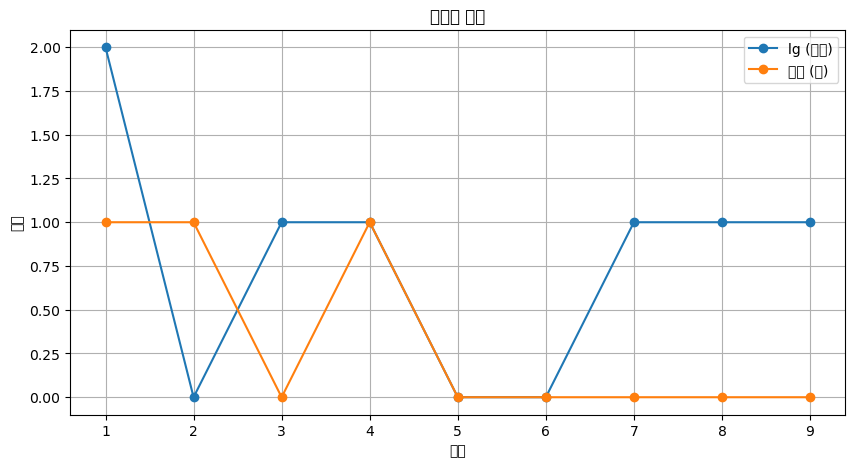

In [419]:
plt.figure(figsize=(10, 5))
plot_inning_scores("lg (원정)", result['away_inning_scores'])
plot_inning_scores("한화 (홈)", result['home_inning_scores'])
plt.show()

In [421]:
def print_player_stats(team_name, stats_dict):
    print(f"\n📊 {team_name} 타자 성적")
    print("-" * 30)
    for player, stats in stats_dict.items():
        ab = stats['타수']
        hits = stats['안타']
        avg = hits / ab if ab > 0 else 0
        print(f"{player}: {ab}타수 {hits}안타 ({avg:.3f})")

In [423]:
print_player_stats("lg", result['away_stats'])
print_player_stats("한화", result['home_stats'])


📊 lg 타자 성적
------------------------------
박동원: 5타수 1안타 (0.200)
오스틴: 4타수 2안타 (0.500)
문보경: 4타수 3안타 (0.750)
김현수: 4타수 0안타 (0.000)
송찬의: 4타수 0안타 (0.000)
홍창기: 4타수 2안타 (0.500)
오지환: 4타수 2안타 (0.500)
박해민: 4타수 0안타 (0.000)
구본혁: 4타수 0안타 (0.000)

📊 한화 타자 성적
------------------------------
이진영: 4타수 1안타 (0.250)
노시환: 4타수 0안타 (0.000)
문현빈: 4타수 0안타 (0.000)
최재훈: 4타수 1안타 (0.250)
채은성: 3타수 2안타 (0.667)
플로리얼: 3타수 0안타 (0.000)
최인호: 3타수 0안타 (0.000)
황영묵: 3타수 0안타 (0.000)
김태연: 3타수 0안타 (0.000)


## 몬테카를로 알고리즘을 활용해서 경기수를 N번 반복했을 때의 평균 점수 및 승률을 예측해보기

In [425]:
def simulate_game_monte_carlo(n_simulations, away_lineup, away_probs, home_lineup, home_probs):
    results = []
    for _ in range(n_simulations):
        game_result = simulate_game(away_lineup, away_probs, home_lineup, home_probs)
        results.append(game_result)
    return results

In [427]:
def summarize_results(results):
    away_total = [r['away_total'] for r in results]
    home_total = [r['home_total'] for r in results]
    print(f"평균 점수 (AWAY): {sum(away_total)/len(away_total):.2f}")
    print(f"평균 점수 (HOME): {sum(home_total)/len(home_total):.2f}")
    print(f"승률 (AWAY): {sum(1 for i in range(len(results)) if away_total[i] > home_total[i]) / len(results):.2%}")
    print(f"승률 (HOME): {sum(1 for i in range(len(results)) if home_total[i] > away_total[i]) / len(results):.2%}")

In [429]:
lg_probs = compute_player_hit_probs(lg_merged)
hh_probs = compute_player_hit_probs(hh_merged)

## 200번 반복했을 때의 결과값

In [431]:
monte_results = simulate_game_monte_carlo(
    n_simulations=200,
    away_lineup=lg_lineup,
    away_probs=lg_probs,
    home_lineup=hh_lineup,
    home_probs=hh_probs
)

In [433]:
summarize_results(monte_results)

평균 점수 (AWAY): 5.70
평균 점수 (HOME): 5.71
승률 (AWAY): 39.00%
승률 (HOME): 46.00%
